# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     819.8
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           6.39e-40
Time:                        16:13:35   Log-Likelihood:                -2.7373
No. Observations:                  50   AIC:                             13.47
Df Residuals:                      46   BIC:                             21.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9889      0.091     54.930      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.49940363  4.95343382  5.3725393   5.73298579  6.01960456  6.22828468
  6.36664835  6.45279869  6.51234533  6.57419695  6.66581156  6.80868527
  7.01482057  7.28475429  7.60746945  7.9622053   8.32186824  8.65748326
  8.94295442  9.15935234  9.29802425  9.36201564  9.36556984  9.33178793
  9.28883329  9.2653044   9.28553623  9.36560208  9.51067274  9.71416697
  9.95883278 10.21958188 10.46761161 10.67513716 10.81995648 10.88909807
 10.88095215 10.80553511 10.68284389 10.53957049 10.40471661 10.3048287
 10.25963647 10.27881137 10.36037758 10.49103664 10.64835235 10.80443696
 10.93053307 11.00173838]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.99018238 10.86254861 10.63591568 10.34920358 10.05364469  9.80024036
  9.62727393  9.55093769  9.56136841  9.62506222]


## Plot comparison

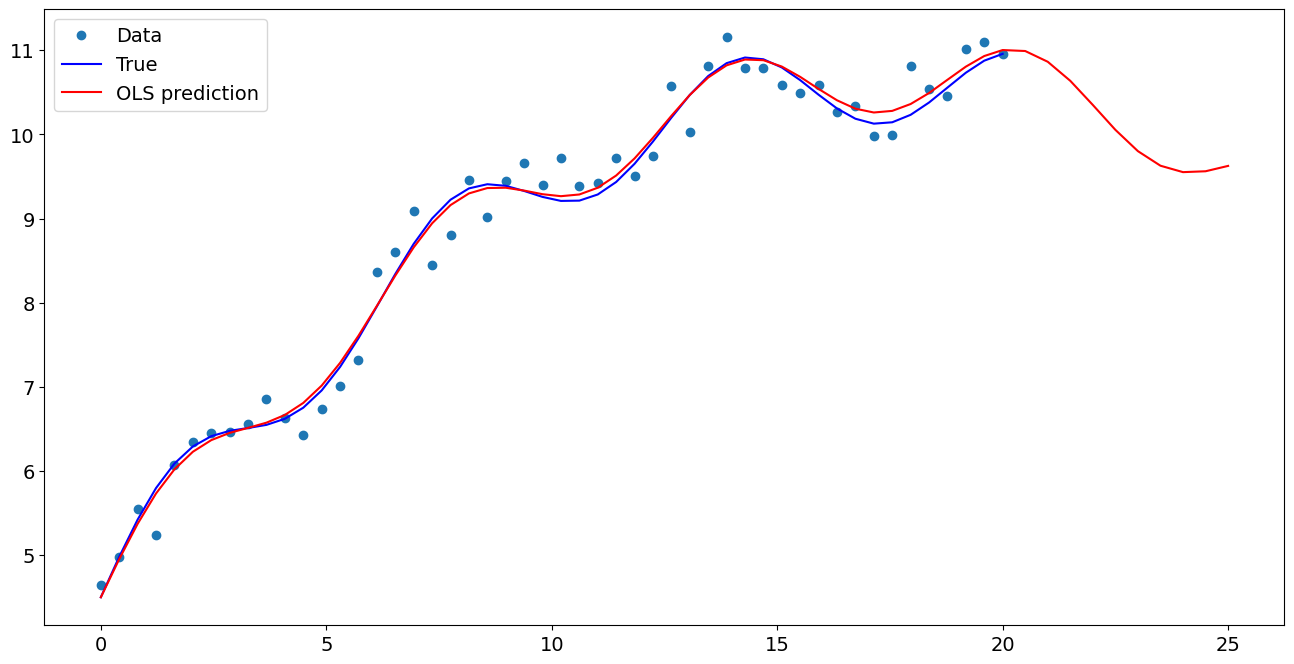

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.988931
x1                  0.501048
np.sin(x1)          0.435499
I((x1 - 5) ** 2)   -0.019581
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.990182
1    10.862549
2    10.635916
3    10.349204
4    10.053645
5     9.800240
6     9.627274
7     9.550938
8     9.561368
9     9.625062
dtype: float64